In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/volcanic-eruptions/database.csv


# DISPLAYING THE DATASET USING PANDAS

In [2]:
# Displaying the dataset using Pandas
data = pd.read_csv("/kaggle/input/volcanic-eruptions/database.csv")
print(data)

      Number                       Name         Country  \
0     210010  West Eifel Volcanic Field         Germany   
1     210020            Chaine des Puys          France   
2     210030        Olot Volcanic Field           Spain   
3     210040   Calatrava Volcanic Field           Spain   
4     211001                 Larderello           Italy   
...      ...                        ...             ...   
1503  390130                 Zavodovski  United Kingdom   
1504  390140        Protector Seamounts  United Kingdom   
1505  390812            Rittmann, Mount      Antarctica   
1506  390829          James Ross Island      Antarctica   
1507  390847                   Melville      Antarctica   

                              Region                 Type  \
0     Mediterranean and Western Asia              Maar(s)   
1     Mediterranean and Western Asia         Lava dome(s)   
2     Mediterranean and Western Asia  Pyroclastic cone(s)   
3     Mediterranean and Western Asia  Pyroclast

# DROPPING THE NUMBER COLUMN

In [3]:
# Dropping the Number Column
data = data.drop(columns = ["Number"])
print(data)

                           Name         Country  \
0     West Eifel Volcanic Field         Germany   
1               Chaine des Puys          France   
2           Olot Volcanic Field           Spain   
3      Calatrava Volcanic Field           Spain   
4                    Larderello           Italy   
...                         ...             ...   
1503                 Zavodovski  United Kingdom   
1504        Protector Seamounts  United Kingdom   
1505            Rittmann, Mount      Antarctica   
1506          James Ross Island      Antarctica   
1507                   Melville      Antarctica   

                              Region                 Type  \
0     Mediterranean and Western Asia              Maar(s)   
1     Mediterranean and Western Asia         Lava dome(s)   
2     Mediterranean and Western Asia  Pyroclastic cone(s)   
3     Mediterranean and Western Asia  Pyroclastic cone(s)   
4     Mediterranean and Western Asia  Explosion crater(s)   
...                  

# CHECKING THE PRESENCE OF NULL VALUES

In [4]:
# Checking the presence of Null values
data.isnull().sum()

Name                    0
Country                 0
Region                  0
Type                    0
Activity Evidence       1
Last Known Eruption     0
Latitude                0
Longitude               0
Elevation (Meters)      0
Dominant Rock Type     53
Tectonic Setting        7
dtype: int64

# DROPPING THE ROWS WHICH CONTAIN NULL VALUES

In [5]:
# Dropping the rows which contain Null values
data = data.dropna()
data = data[data.Type != 'Unknown']
data = data[data["Last Known Eruption"] != 'Unknown']
data = data[data["Dominant Rock Type"] != 'No Data']
print(data)

                           Name         Country  \
0     West Eifel Volcanic Field         Germany   
1               Chaine des Puys          France   
3      Calatrava Volcanic Field           Spain   
5                       Vulsini           Italy   
7                 Campi Flegrei           Italy   
...                         ...             ...   
1498             Montagu Island  United Kingdom   
1499                   Saunders  United Kingdom   
1500           Candlemas Island  United Kingdom   
1503                 Zavodovski  United Kingdom   
1504        Protector Seamounts  United Kingdom   

                              Region                 Type  Activity Evidence  \
0     Mediterranean and Western Asia              Maar(s)     Eruption Dated   
1     Mediterranean and Western Asia         Lava dome(s)     Eruption Dated   
3     Mediterranean and Western Asia  Pyroclastic cone(s)     Eruption Dated   
5     Mediterranean and Western Asia              Caldera  Eruption

# DATA PREPARATION - "TYPE" COLUMN

In [6]:
# Data Preparation - "Type" Column
data["Type"] = data["Type"].str.replace('[(,),?]', '') 
data["Type"] = data["Type"].replace(to_replace=["Calderas","Complexes","Fissure vents","Lava cones", "Maars", "Lava domes", "Pyroclastic cones","Shields", "Stratovolcanoes",
                              "Submarinees", "Tuff cones", "Volcanic fields"], 
                  value=["Caldera", "Complex","Fissure vent","Lava cone", "Maar", "Lava dome","Pyroclastic cone","Shield", "Stratovolcano",
                        "Submarine", "Tuff cone", "Volcanic field"])
print(data["Type"])

0                   Maar
1              Lava dome
3       Pyroclastic cone
5                Caldera
7                Caldera
              ...       
1498              Shield
1499       Stratovolcano
1500       Stratovolcano
1503       Stratovolcano
1504           Submarine
Name: Type, Length: 849, dtype: object


# COUNTING THE DUPLICATES IN COUNTRY COLUMN

In [7]:
# Counting the duplicates in Country column
dup = data.pivot_table(index = ['Country'], aggfunc ='size') 
dup = dup.reset_index()
dup.columns= ["Country", "Counts"]
print(dup)

               Country  Counts
0           Antarctica       9
1            Argentina       6
2              Armenia       2
3   Armenia-Azerbaijan       2
4            Australia       3
..                 ...     ...
75      United Kingdom      10
76       United States     120
77             Vanuatu       9
78             Vietnam       1
79               Yemen       6

[80 rows x 2 columns]


# DISPLAYING COUNTRIES HAVING VOLCANOES FROM HIGHEST TO THE LOWEST

In [8]:
# Displaying Countries having volcanoes from highest to the lowest 
lar = dup.nlargest(80, ["Counts"])
print(lar)

                  Country  Counts
76          United States     120
40                  Japan      90
56                 Russia      82
37              Indonesia      79
9                   Chile      47
..                    ...     ...
27      Ethiopia-Djibouti       1
30                Georgia       1
8              Cape Verde       1
58            Saint Lucia       1
57  Saint Kitts and Nevis       1

[80 rows x 2 columns]


# DISPLAYING TOP 20 COUNTRIES HAVING HIGHER NUMBER OF VOLCANOES

In [9]:
# Displaying first set of top 20 Countries having higher number of volcanoes
a = lar[0:20]
print(a)

              Country  Counts
76      United States     120
40              Japan      90
56             Russia      82
37          Indonesia      79
9               Chile      47
22            Ecuador      28
52   Papua New Guinea      24
35            Iceland      23
54        Philippines      23
44             Mexico      18
74  Undersea Features      16
48        New Zealand      16
29             France      13
14           Colombia      12
55           Portugal      12
71              Tonga      12
39              Italy      11
26           Ethiopia      10
49          Nicaragua      10
7              Canada      10


# VISUALIZATION OF TOP 20 COUNTRIES HAVING HIGHER NUMBER OF VOLCANOES USING PIE CHART

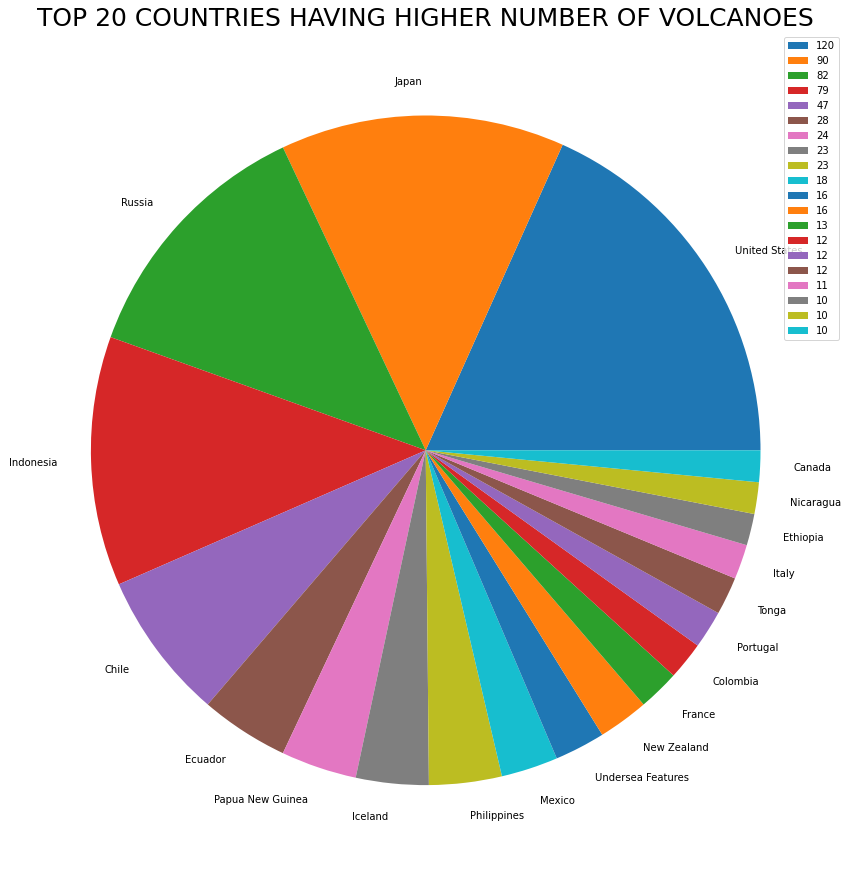

In [10]:
# Importing Matplotlib Library
from matplotlib import pyplot as plt 

# Creating Pie Chart
fig = plt.figure(figsize =(15, 70)) 
plt.pie(a["Counts"], labels = a["Country"])
plt.legend(a["Counts"], fontsize=10)
plt.title("TOP 20 COUNTRIES HAVING HIGHER NUMBER OF VOLCANOES", fontsize=25)

# Displaying Pie Chart 
plt.show() 

# DISPLAYING SECOND SET OF 20 COUNTRIES HAVING HIGHER NUMBER OF VOLCANOES

In [11]:
# Displaying second set of 20 Countries having higher number of volcanoes next to first set
b = lar[20:40]
print(b)

                           Country  Counts
42                           Kenya      10
75                  United Kingdom      10
53                            Peru      10
41  Japan - administered by Russia       9
77                         Vanuatu       9
0                       Antarctica       9
10                 Chile-Argentina       9
12                           China       7
34                       Guatemala       7
17                      Costa Rica       7
70                        Tanzania       6
65                           Spain       6
1                        Argentina       6
79                           Yemen       6
61                    Saudi Arabia       5
23                     El Salvador       5
72                          Turkey       5
62                 Solomon Islands       4
32                          Greece       4
21                        Dominica       3


# VISUALIZATION OF SECOND SET OF 20 COUNTRIES USING STACK PLOT

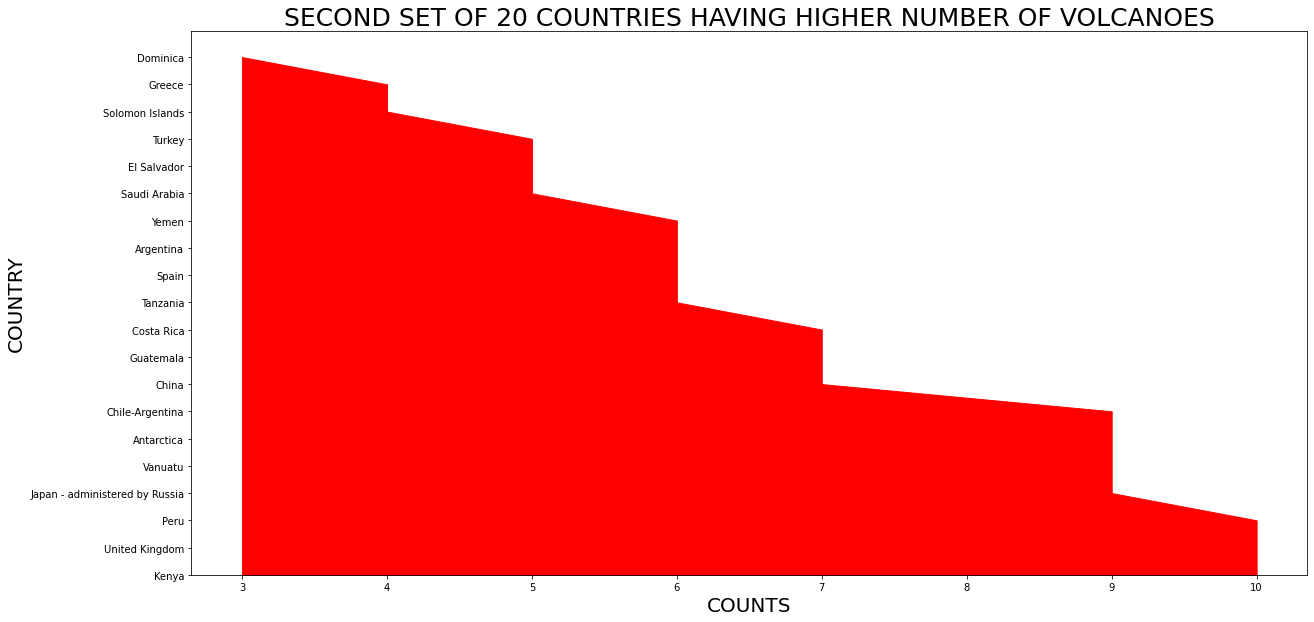

In [12]:
# Creating Stack Plot
fig = plt.figure(figsize =(20, 10)) 
plt.stackplot(b["Counts"], b["Country"], color="red") 
plt.xlabel("COUNTS", fontsize=20) 
plt.ylabel("COUNTRY", fontsize=20) 
plt.title("SECOND SET OF 20 COUNTRIES HAVING HIGHER NUMBER OF VOLCANOES", fontsize=25)

# Displaying Stack Plot
plt.show() 

# DISPLAYING THIRD SET OF 20 COUNTRIES HAVING HIGHER NUMBER OF VOLCANOES

In [13]:
# Displaying third set of 20 Countries having higher number of volcanoes next to second set
c = lar[40:60]
print(c)

                      Country  Counts
66                      Sudan       3
11              Chile-Bolivia       3
4                   Australia       3
64                South Korea       2
69                     Taiwan       2
50                     Norway       2
28                       Fiji       2
25                    Eritrea       2
18                   DR Congo       2
19            DR Congo-Rwanda       2
3          Armenia-Azerbaijan       2
2                     Armenia       2
47                Netherlands       2
6                    Cameroon       1
73                     Uganda       1
5             Burma (Myanmar)       1
68  Syria-Jordan-Saudi Arabia       1
67                      Syria       1
24          Equatorial Guinea       1
78                    Vietnam       1


# VISUALIZATION OF THIRD SET OF 20 COUNTRIES USING LINEAR PLOT WITH CUSTOMIZATIONS

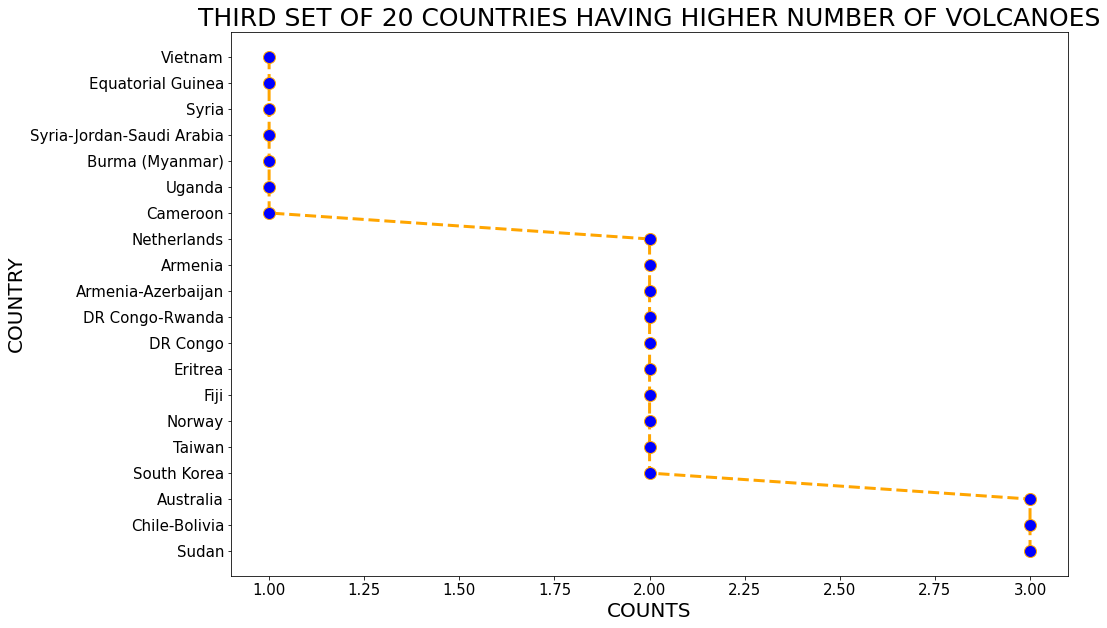

In [14]:
# Creating Linear Plot with Customizations
fig = plt.figure(figsize =(15, 10)) 
plt.plot(c["Counts"], c["Country"], color='orange', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
plt.xlabel("COUNTS", fontsize=20) 
plt.xticks(fontsize=15)
plt.ylabel("COUNTRY", fontsize=20) 
plt.yticks(fontsize=15)
plt.title("THIRD SET OF 20 COUNTRIES HAVING HIGHER NUMBER OF VOLCANOES", fontsize=25)

# Displaying Linear Plot with Customizations
plt.show() 

# DISPLAYING SET OF 20 COUNTRIES HAVING LEAST NUMBER OF VOLCANOES

In [15]:
# Displaying set of 20 Countries having least number of volcanoes
d = lar[60:]
print(d)

                             Country  Counts
63                      South Africa       1
33                           Grenada       1
60                             Samoa       1
59  Saint Vincent and the Grenadines       1
36                             India       1
38                              Iran       1
20                          Djibouti       1
43                        Madagascar       1
31                           Germany       1
45                  Mexico-Guatemala       1
46                          Mongolia       1
16                           Comoros       1
15                  Colombia-Ecuador       1
51                            Panama       1
13                 China-North Korea       1
27                 Ethiopia-Djibouti       1
30                           Georgia       1
8                         Cape Verde       1
58                       Saint Lucia       1
57             Saint Kitts and Nevis       1


# VISUALIZING A SET OF 20 COUNTRIES HAVING LEAST NUMBER OF VOLCANOES USING DONUT PLOT 

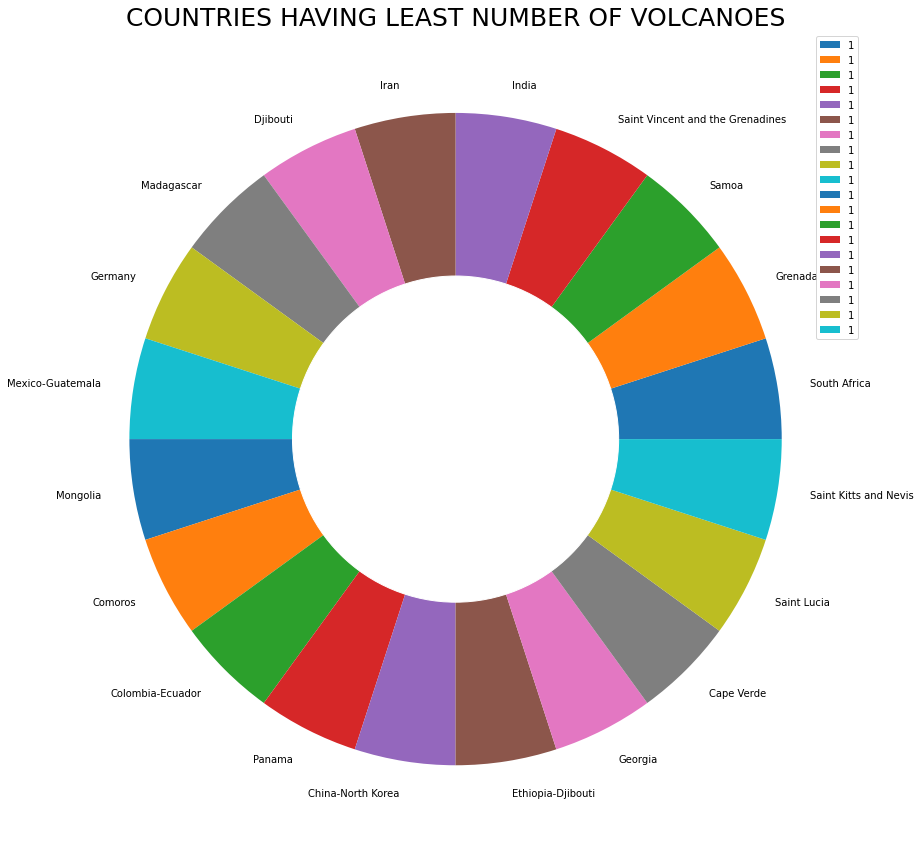

In [16]:
# Creating Donut Plot
fig = plt.figure(figsize =(15, 15)) 
circle = plt.Circle( (0,0), 0.5, color='white')
plt.pie(d["Counts"], labels=d["Country"])
p=plt.gcf()
p.gca().add_artist(circle)
plt.legend(d["Counts"])
plt.title("COUNTRIES HAVING LEAST NUMBER OF VOLCANOES", fontsize=25)

# Displaying Donut Plot
plt.show() 

# COUNTING THE DUPLICATES IN REGION COLUMN

In [17]:
# Counting the duplicates in Region column
reg = data.pivot_table(index = ['Region'], aggfunc ='size') 
reg = reg.reset_index()
reg.columns= ["Region", "Counts"]
print(reg)

                            Region  Counts
0               Africa and Red Sea      42
1                           Alaska      58
2                       Antarctica      16
3                   Atlantic Ocean      21
4           Canada and Western USA      49
5         Hawaii and Pacific Ocean      27
6         Iceland and Arctic Ocean      24
7                        Indonesia      80
8          Japan, Taiwan, Marianas     105
9      Kamchatka and Mainland Asia      69
10                   Kuril Islands      30
11  Mediterranean and Western Asia      29
12         Melanesia and Australia      41
13    Middle East and Indian Ocean      21
14      México and Central America      49
15             New Zealand to Fiji      33
16         Philippines and SE Asia      27
17                   South America     116
18                     West Indies      12


# DISPLAYING REGIONS HAVING HIGHER NUMBER OF VOLCANOES TO THE LOWEST

In [18]:
# Displaying Regions having volcanoes from highest to the lowest 
lac = reg.nlargest(19, ["Counts"])
print(lac)

                            Region  Counts
17                   South America     116
8          Japan, Taiwan, Marianas     105
7                        Indonesia      80
9      Kamchatka and Mainland Asia      69
1                           Alaska      58
14      México and Central America      49
4           Canada and Western USA      49
0               Africa and Red Sea      42
12         Melanesia and Australia      41
15             New Zealand to Fiji      33
10                   Kuril Islands      30
11  Mediterranean and Western Asia      29
5         Hawaii and Pacific Ocean      27
16         Philippines and SE Asia      27
6         Iceland and Arctic Ocean      24
13    Middle East and Indian Ocean      21
3                   Atlantic Ocean      21
2                       Antarctica      16
18                     West Indies      12


# VISUALIZATION OF REGIONS HAVING HIGHER NUMBER OF VOLCANOES TO THE LOWEST BY DONUT PLOT

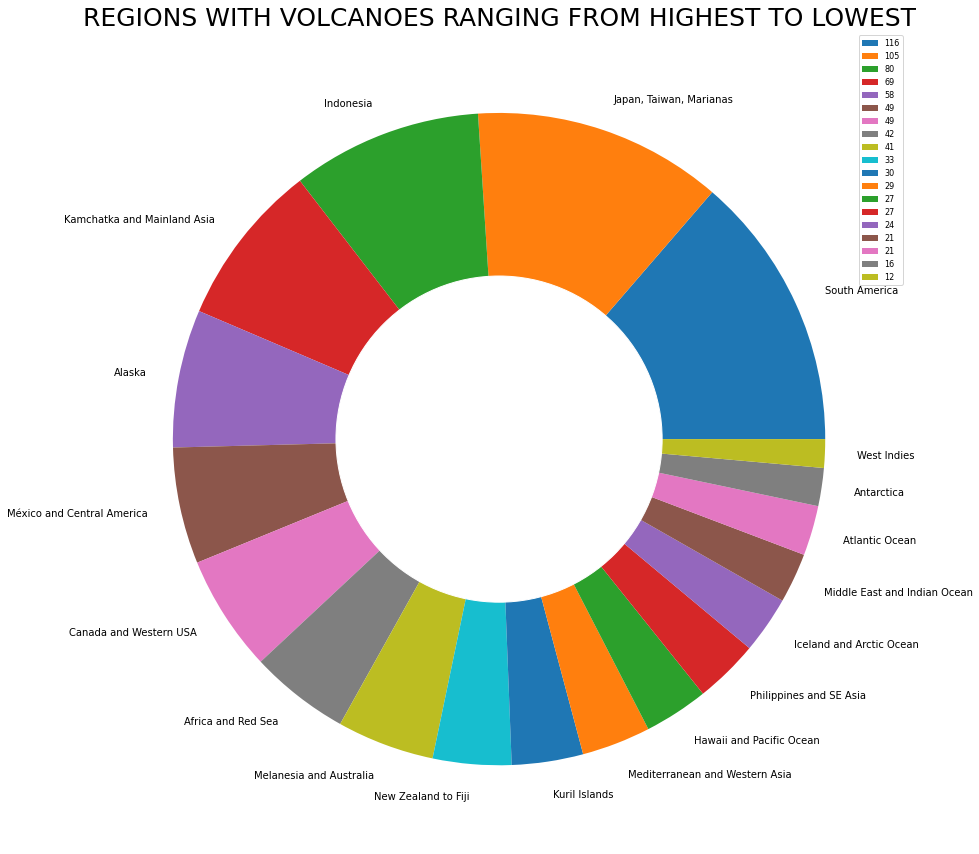

In [19]:
# Creating Donut Plot
fig = plt.figure(figsize =(15, 15)) 
circle = plt.Circle( (0,0), 0.5, color='white')
plt.pie(lac["Counts"], labels=lac["Region"])
p=plt.gcf()
p.gca().add_artist(circle)
plt.legend(lac["Counts"], fontsize=8)
plt.title("REGIONS WITH VOLCANOES RANGING FROM HIGHEST TO LOWEST",fontsize=25)

# Displaying Donut Plot
plt.show() 

# COUNTING THE DUPLICATES IN TYPE COLUMN

In [20]:
# Counting the duplicates in Type column
tpe = data.pivot_table(index = ["Type"], aggfunc = 'size') 
tpe = tpe.reset_index()
tpe.columns= ["Type", "Counts"]
print(tpe)

                  Type  Counts
0              Caldera      64
1              Complex      37
2             Compound       6
3                Cones       1
4          Crater rows       5
5         Fissure vent       8
6            Lava cone       2
7            Lava dome      27
8                 Maar       8
9     Pyroclastic cone      43
10  Pyroclastic shield       5
11              Shield      81
12       Stratovolcano     460
13          Subglacial       5
14           Submarine      61
15           Tuff cone       1
16          Tuff rings       1
17      Volcanic field      34


# DISPLAYING DIFFERENT TYPES OF VOLCANOES AND THEIR COUNTS

In [21]:
# Displaying different types of volcanoes and their occurrence from highest to the lowest 
tpes = tpe.nlargest(18, ["Counts"])
print(tpes)

                  Type  Counts
12       Stratovolcano     460
11              Shield      81
0              Caldera      64
14           Submarine      61
9     Pyroclastic cone      43
1              Complex      37
17      Volcanic field      34
7            Lava dome      27
5         Fissure vent       8
8                 Maar       8
2             Compound       6
10  Pyroclastic shield       5
4          Crater rows       5
13          Subglacial       5
6            Lava cone       2
3                Cones       1
15           Tuff cone       1
16          Tuff rings       1


# VISUALIZING DIFFERENT TYPES OF VOLCANOES AND THEIR COUNTS USING BAR CHART

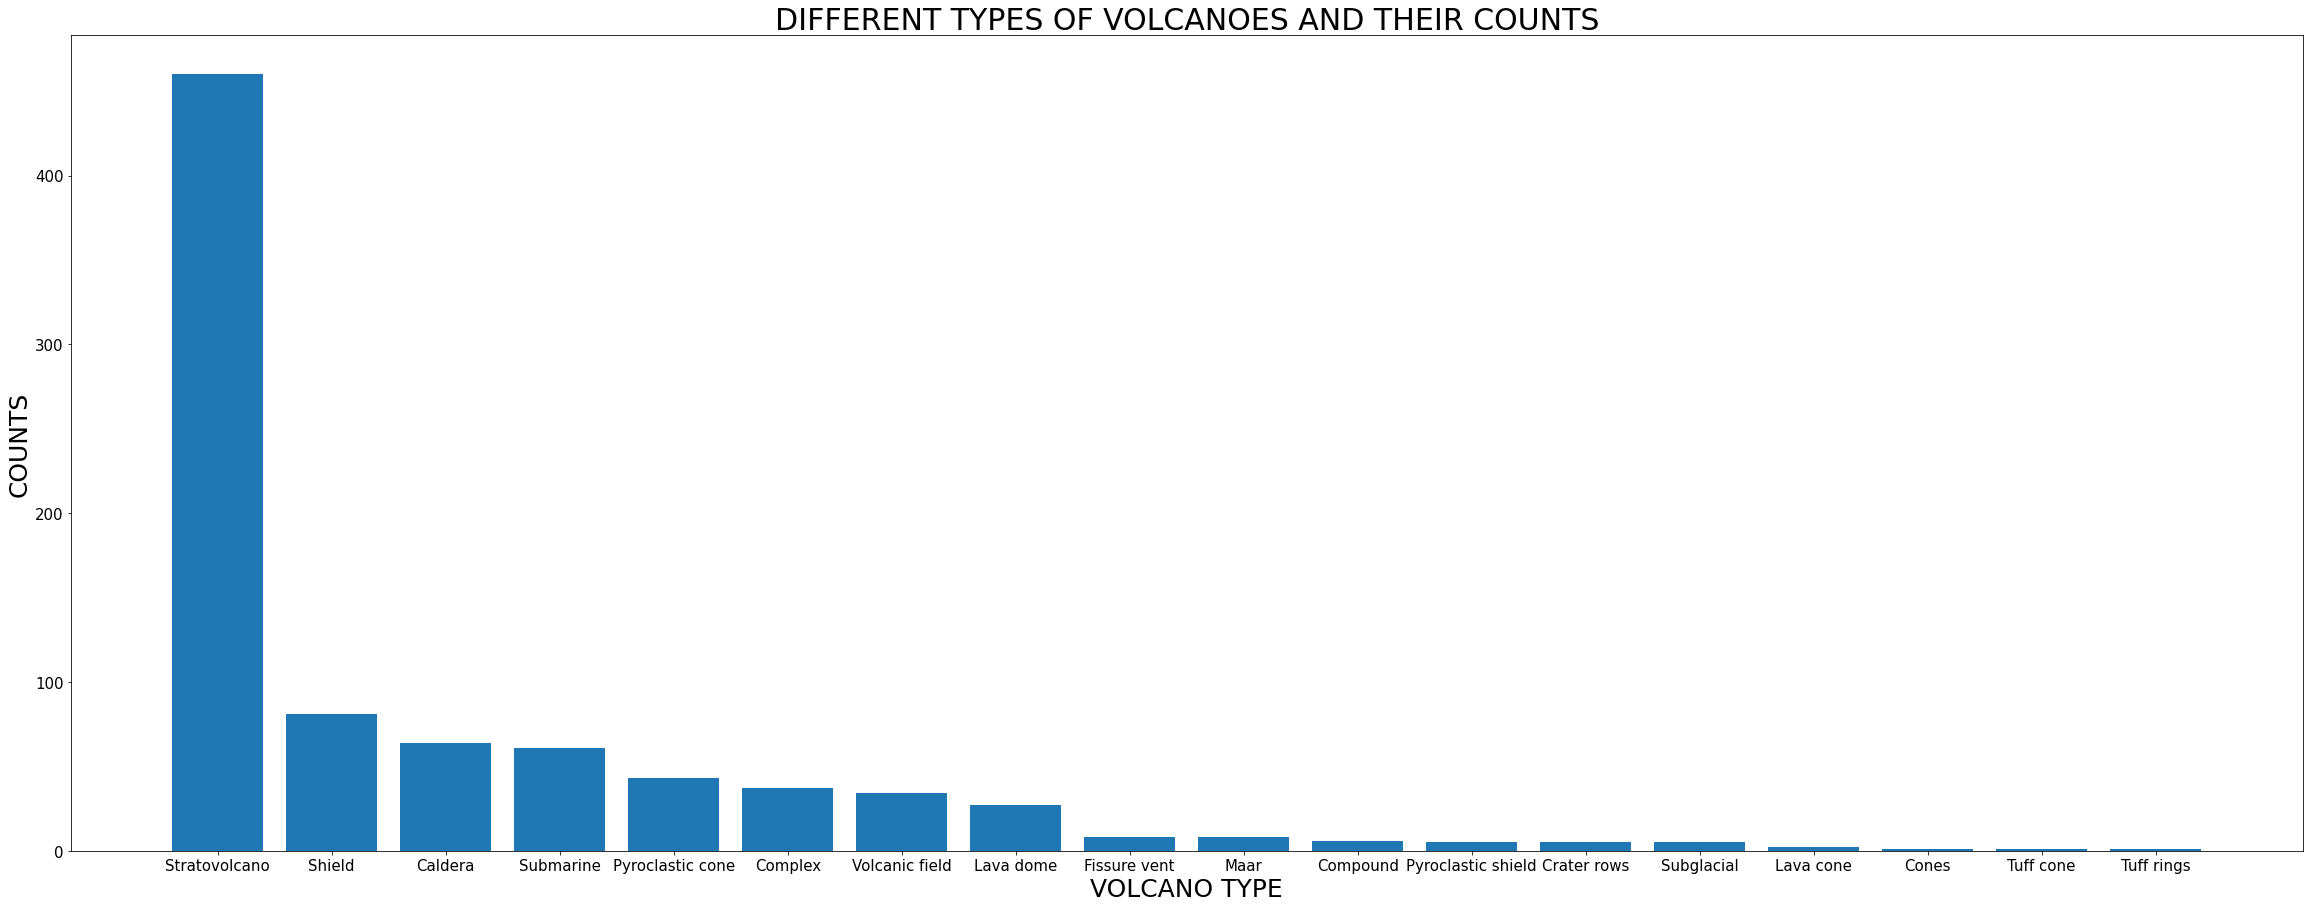

In [22]:
# Creating Bar Chart
fig = plt.figure(figsize =(40, 15)) 
plt.bar(tpes["Type"], tpes["Counts"]) 
plt.xlabel("VOLCANO TYPE", fontsize=25) 
plt.xticks(fontsize=15)
plt.ylabel("COUNTS", fontsize=25) 
plt.yticks(fontsize=15)
plt.title("DIFFERENT TYPES OF VOLCANOES AND THEIR COUNTS", fontsize=30)

# Displaying Bar Chart 
plt.show() 

# VISUALIZING DIFFERENT TYPES OF VOLCANOES IN DIFFERENT COUNTRIES

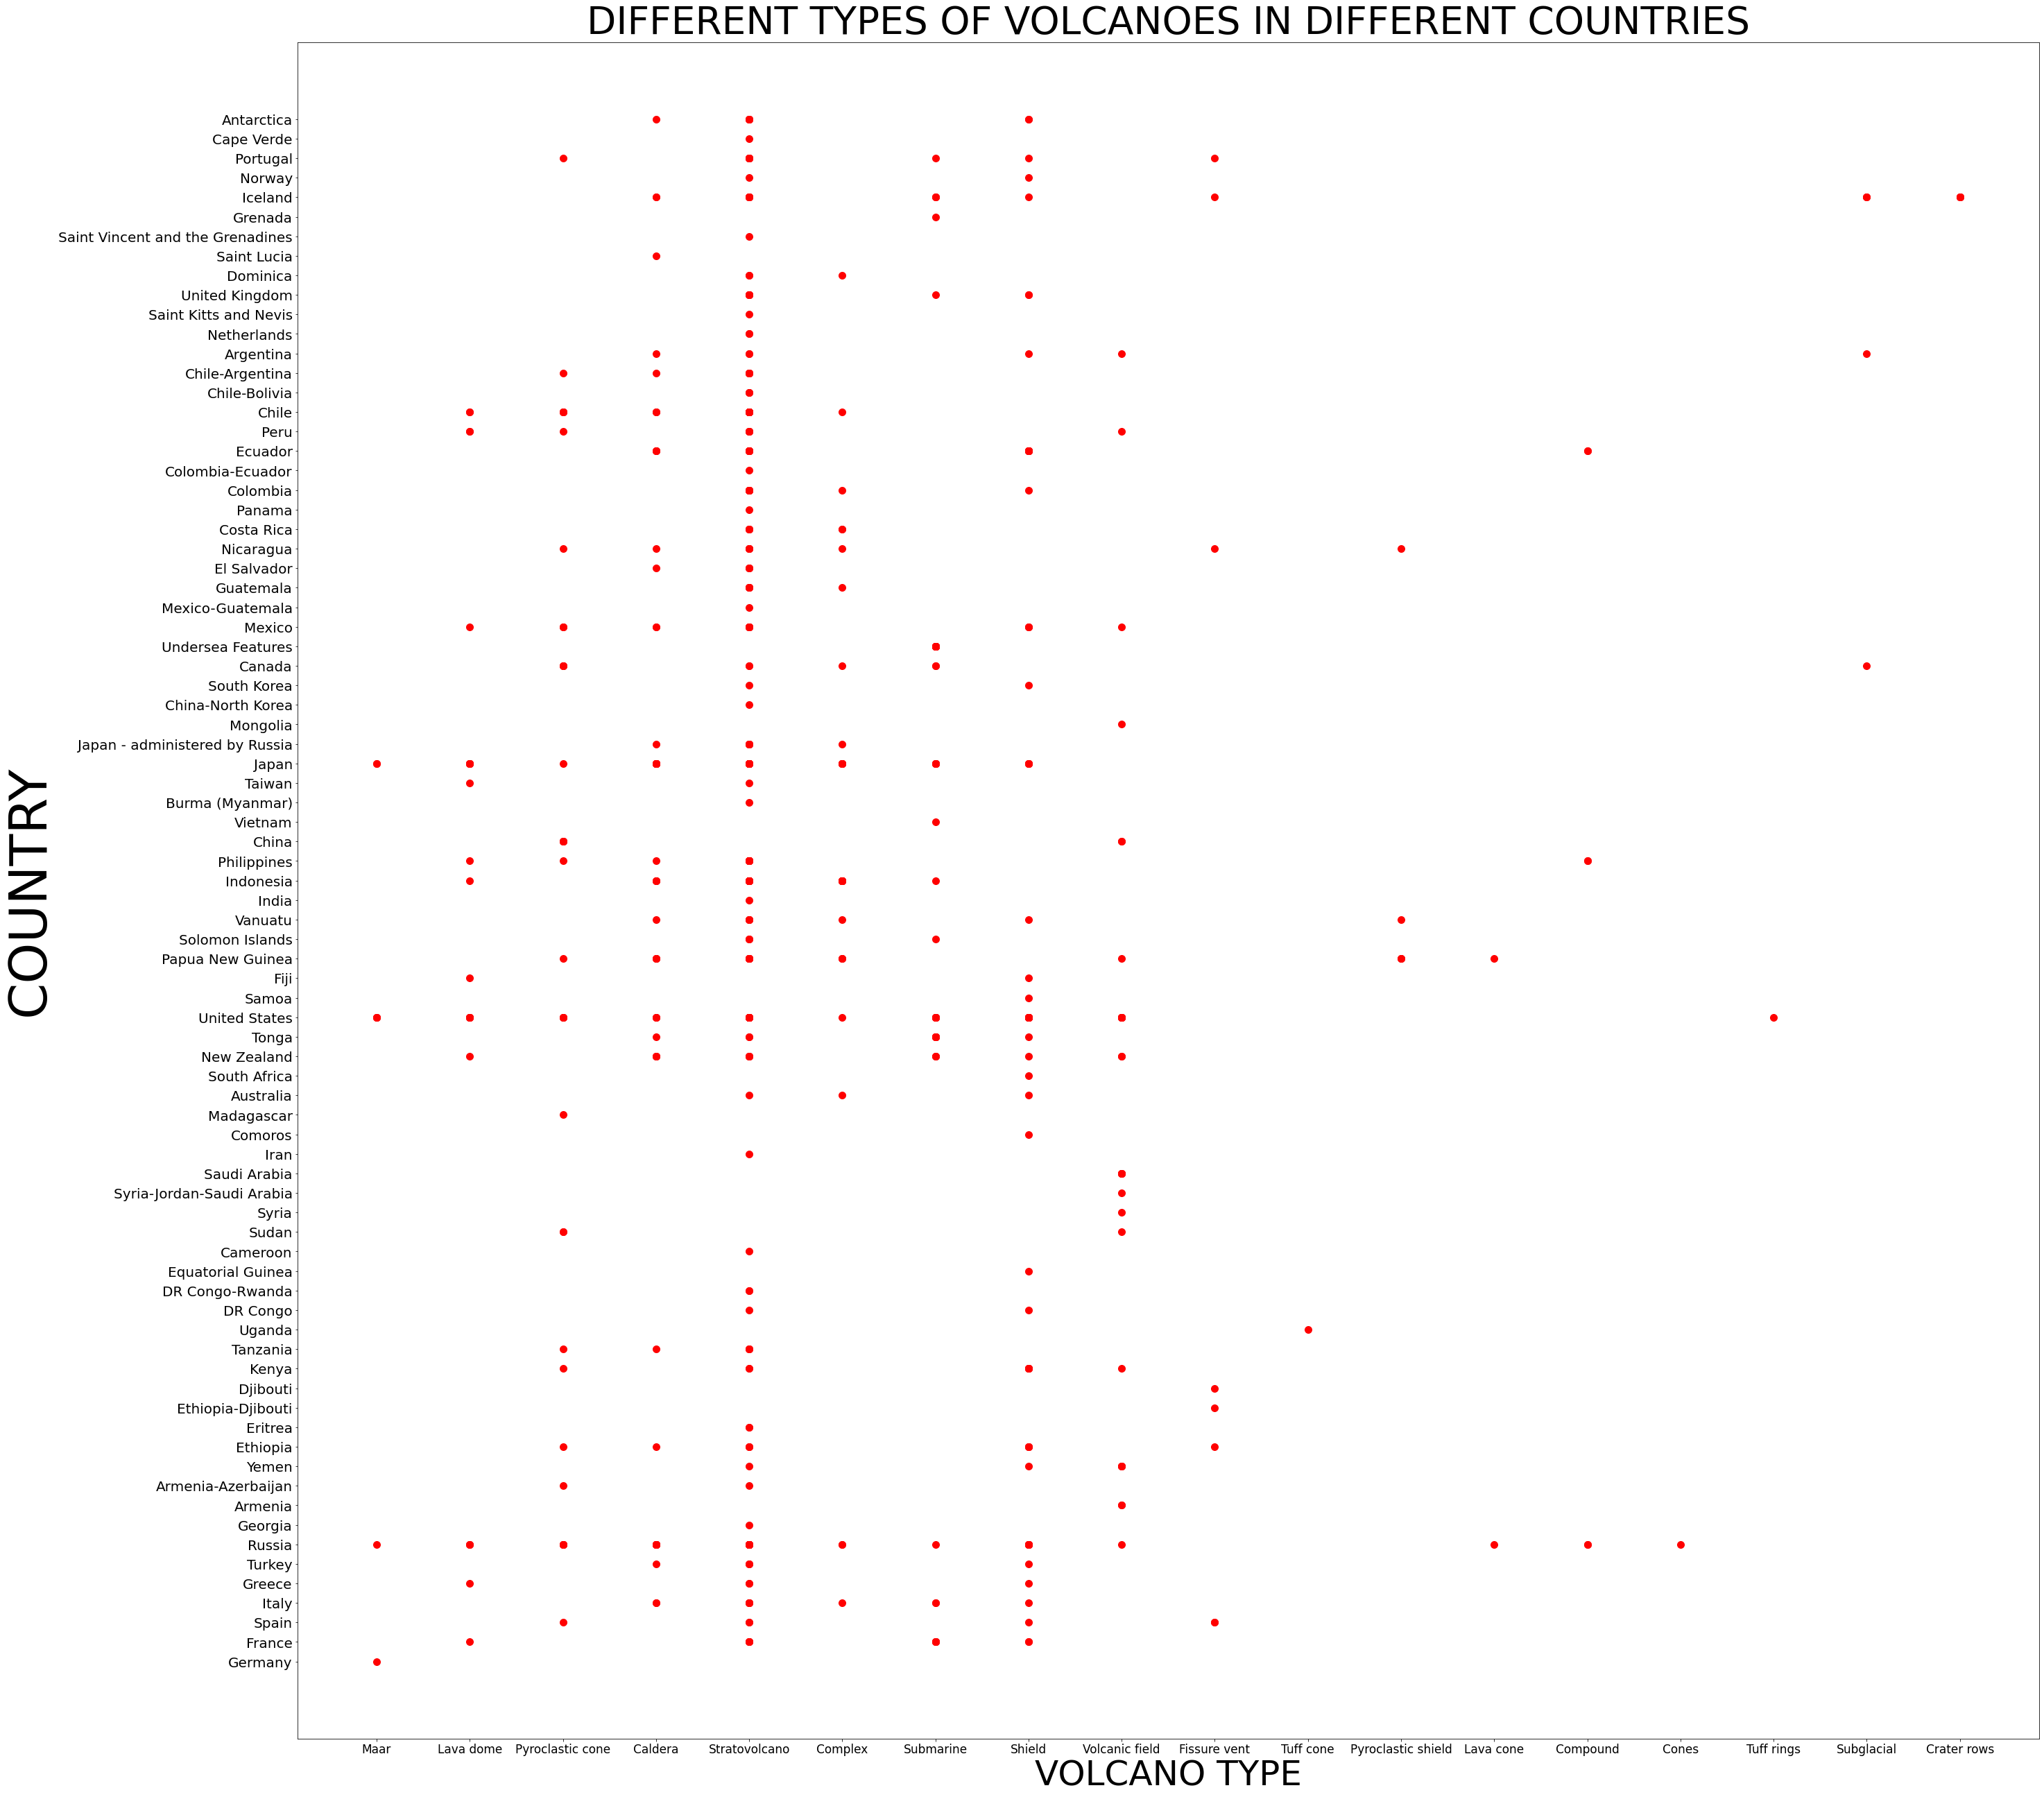

In [23]:
# Creating Scatter Plot
fig = plt.figure(figsize =(45, 45)) 
plt.scatter(data["Type"], data["Country"], marker="o", s=100, color="red") 
plt.xlabel("VOLCANO TYPE", fontsize=50) 
plt.xticks(fontsize=17)
plt.ylabel("COUNTRY", fontsize=75) 
plt.yticks(fontsize=20)
plt.title("DIFFERENT TYPES OF VOLCANOES IN DIFFERENT COUNTRIES", fontsize=55)

# Displaying Scatter Plot
plt.show() 

# VISUALIZING DIFFERENT TYPES OF VOLCANOES IN DIFFERENT REGIONS

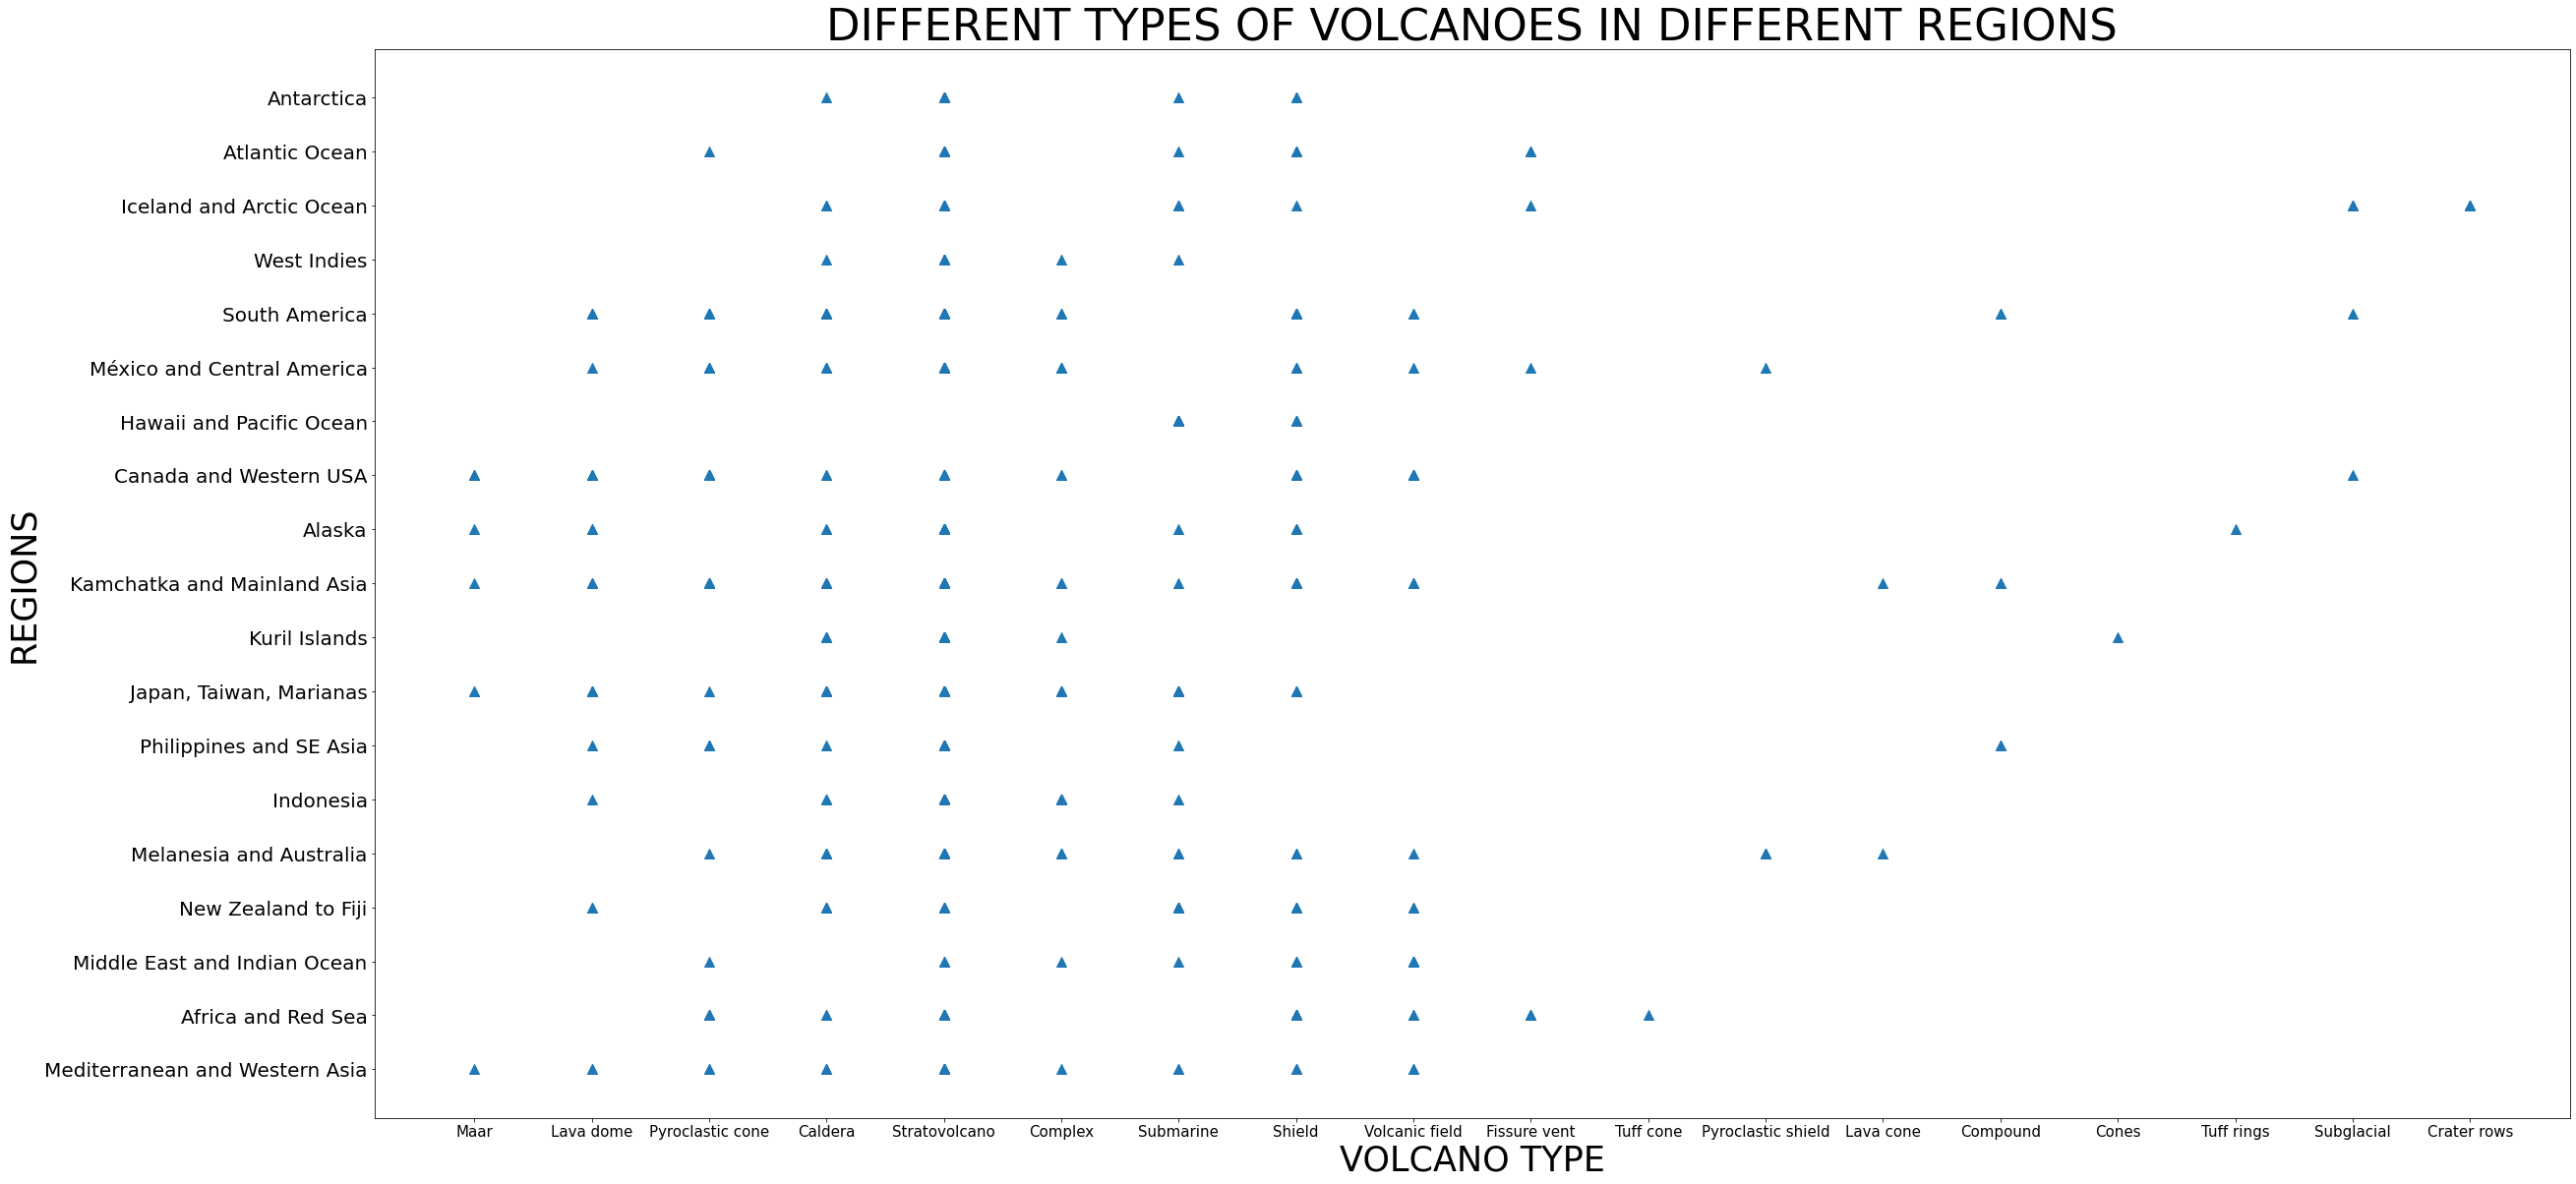

In [24]:
# Creating Scatter Plot
fig = plt.figure(figsize =(40, 20)) 
plt.scatter(data["Type"], data["Region"], marker="^", s=100) 
plt.xlabel("VOLCANO TYPE", fontsize=35) 
plt.xticks(fontsize=15)
plt.ylabel("REGIONS", fontsize=35) 
plt.yticks(fontsize=20)
plt.title("DIFFERENT TYPES OF VOLCANOES IN DIFFERENT REGIONS", fontsize=45)

# Displaying Scatter Plot
plt.show() 

# VISUALIZING DIFFERENT TYPES OF VOLCANOES IN DIFFERENT REGIONS AND COUNTRIES

In [25]:
# Creating Scatter Plot
import plotly.express as px
fig = px.scatter(data, x='Region', y='Country', color='Type', title="DIFFERENT TYPES OF VOLCANOES IN DIFFERENT COUNTRIES AND REGIONS")

# Displaying Scatter Plot
fig.show()

# COUNTING THE DUPLICATES IN ACTIVITY EVIDENCE COLUMN

In [26]:
# Counting the duplicates in Activity Evidence column
ae = data.pivot_table(index = ["Activity Evidence"], aggfunc = 'size') 
ae = ae.reset_index()
ae.columns= ["Activity Evidence", "Counts"]
print(ae)

    Activity Evidence  Counts
0      Eruption Dated     293
1   Eruption Observed     552
2   Evidence Credible       2
3  Evidence Uncertain       2


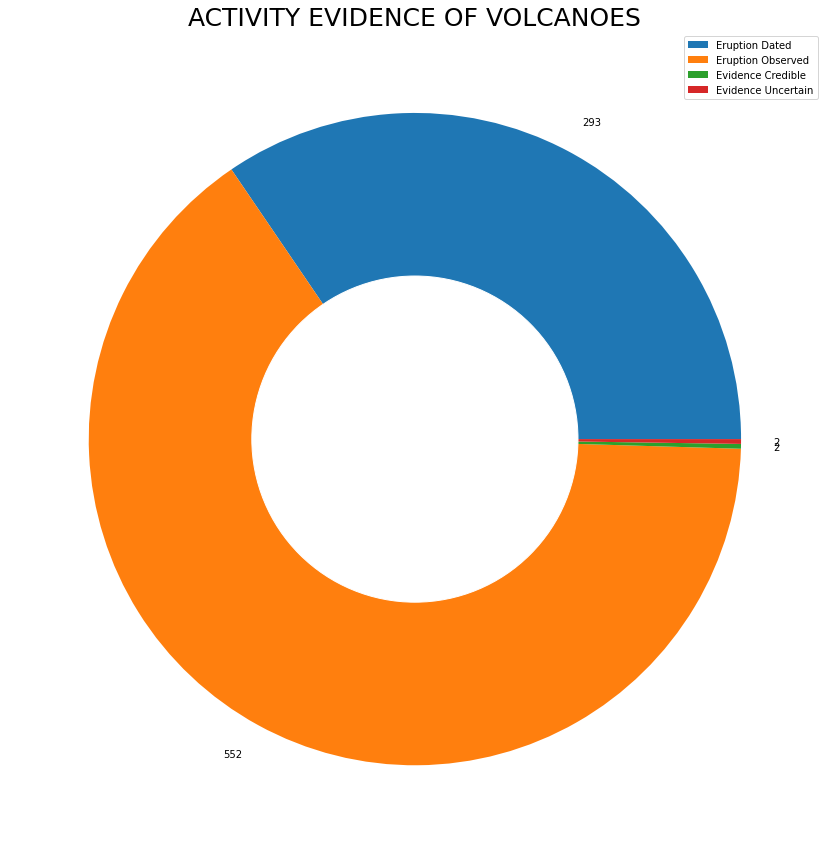

In [27]:
# Creating Donut Plot
fig = plt.figure(figsize =(15, 15)) 
circle = plt.Circle( (0,0), 0.5, color='white')
plt.pie(ae["Counts"], labels=ae["Counts"])
p=plt.gcf()
p.gca().add_artist(circle)
plt.legend(ae["Activity Evidence"])
plt.title("ACTIVITY EVIDENCE OF VOLCANOES",fontsize=25)

# Displaying Donut Plot
plt.show() 

# VISUALIZATION OF VOLCANOES WITH RESPECT TO COUNTRIES, REGIONS, LATITUDE AND LONGITUDE

In [28]:
# Creating and Displaying World map
import plotly.express as px
import geopandas as gpd
fig = px.scatter_geo(data, lat=data.Latitude, lon=data.Longitude, hover_name="Name", color="Region")
fig.show()

# COUNTING THE DUPLICATES IN DOMINANT ROCK TYPE COLUMN

In [29]:
# Counting the duplicates in Dominant Rock Type column

drt = data.pivot_table(index = ["Dominant Rock Type"], aggfunc = 'size') 
drt = drt.reset_index()
drt.columns= ["Dominant Rock Type", "Counts"]
print(drt)

                         Dominant Rock Type  Counts
0              Andesite / Basaltic Andesite     386
1                     Basalt / Picro-Basalt     264
2                                    Dacite      64
3                                   Foidite       6
4        Phono-tephrite /  Tephri-phonolite       2
5                                 Phonolite       6
6                                  Rhyolite      36
7  Trachyandesite / Basaltic Trachyandesite      18
8          Trachybasalt / Tephrite Basanite      39
9                   Trachyte / Trachydacite      28


# VISUALIZING DIFFERENT DOMINANT ROCK TYPES AND THEIR COUNTS USING HORIZONTAL BAR CHART

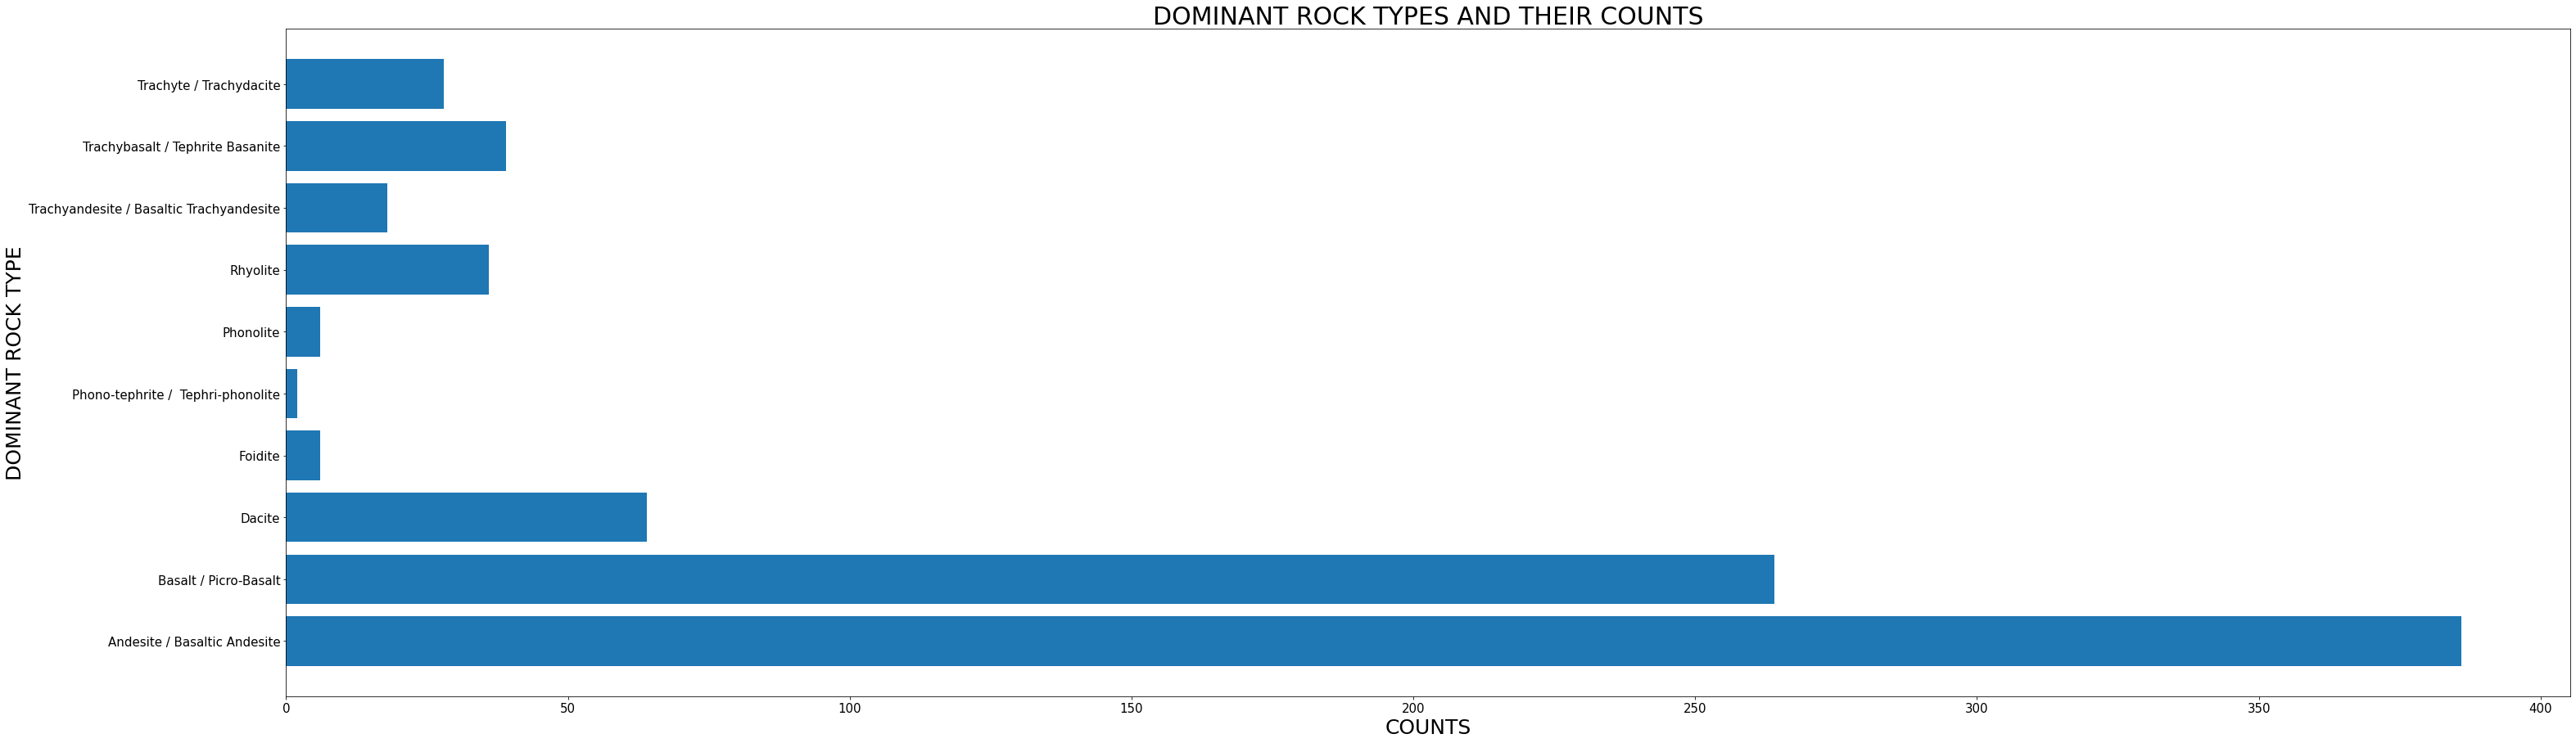

In [30]:
# Creating Bar Chart
fig = plt.figure(figsize =(50, 15)) 
plt.barh(drt["Dominant Rock Type"], drt["Counts"]) 
plt.ylabel("DOMINANT ROCK TYPE", fontsize=25) 
plt.xticks(fontsize=15)
plt.xlabel("COUNTS", fontsize=25) 
plt.yticks(fontsize=15)
plt.title("DOMINANT ROCK TYPES AND THEIR COUNTS", fontsize=30)

# Displaying Bar Chart 
plt.show() 

# COUNTING THE DUPLICATES IN TECTONIC SETTING COLUMN

In [31]:
# Counting the duplicates in Tectonic Setting columN

ts = data.pivot_table(index = ["Tectonic Setting"], aggfunc = 'size') 
ts = ts.reset_index()
ts.columns= ["Tectonic Setting", "Counts"]
print(ts)

                                  Tectonic Setting  Counts
0          Intraplate / Continental Crust (>25 km)      64
1       Intraplate / Intermediate Crust (15-25 km)       3
2             Intraplate / Oceanic Crust (< 15 km)      21
3           Rift Zone / Continental Crust (>25 km)      53
4        Rift Zone / Intermediate Crust (15-25 km)      10
5              Rift Zone / Oceanic Crust (< 15 km)      72
6     Subduction Zone / Continental Crust (>25 km)     446
7        Subduction Zone / Crust Thickness Unknown      49
8  Subduction Zone / Intermediate Crust (15-25 km)      50
9        Subduction Zone / Oceanic Crust (< 15 km)      81


# VISUALIZATION OF TECTONIC SETTING BY USING DONUT PLOT

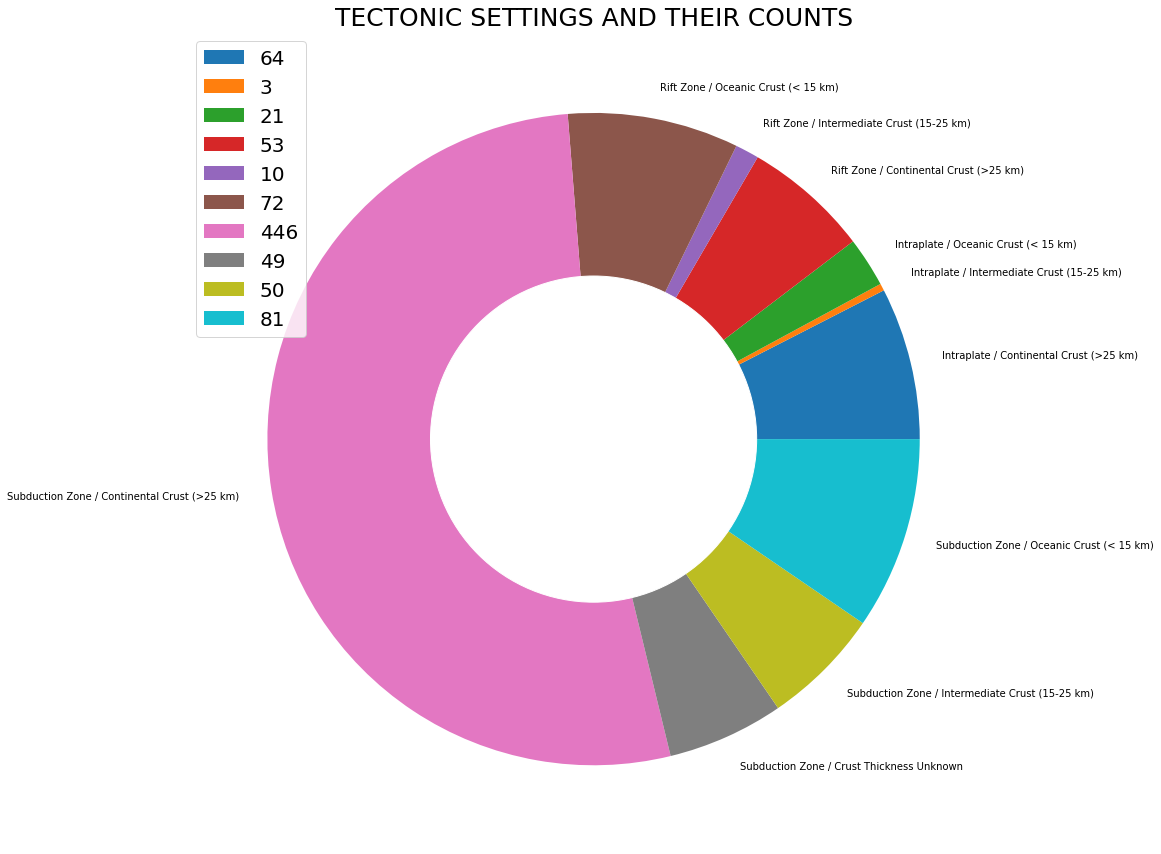

In [32]:
# Creating Donut Plot
fig = plt.figure(figsize =(15, 15)) 
circle = plt.Circle( (0,0), 0.5, color='white')
plt.pie(ts["Counts"], labels=ts["Tectonic Setting"])
p=plt.gcf()
p.gca().add_artist(circle)
plt.legend(ts["Counts"], fontsize=20)
plt.title("TECTONIC SETTINGS AND THEIR COUNTS",fontsize=25)

# Displaying Donut Plot
plt.show() 

# SPLITTING INPUT AND TARGET FEATURES

In [33]:
#Input Features
x = data.drop(columns=["Name", "Type", "Last Known Eruption"])
print(x)

             Country                          Region  Activity Evidence  \
0            Germany  Mediterranean and Western Asia     Eruption Dated   
1             France  Mediterranean and Western Asia     Eruption Dated   
3              Spain  Mediterranean and Western Asia     Eruption Dated   
5              Italy  Mediterranean and Western Asia  Eruption Observed   
7              Italy  Mediterranean and Western Asia  Eruption Observed   
...              ...                             ...                ...   
1498  United Kingdom                      Antarctica  Eruption Observed   
1499  United Kingdom                      Antarctica  Eruption Observed   
1500  United Kingdom                      Antarctica  Eruption Observed   
1503  United Kingdom                      Antarctica  Eruption Observed   
1504  United Kingdom                      Antarctica  Eruption Observed   

      Latitude  Longitude  Elevation (Meters)       Dominant Rock Type  \
0       50.170      6.850

In [34]:
#Output features
y = data[["Type"]]
print(y)

                  Type
0                 Maar
1            Lava dome
3     Pyroclastic cone
5              Caldera
7              Caldera
...                ...
1498            Shield
1499     Stratovolcano
1500     Stratovolcano
1503     Stratovolcano
1504         Submarine

[849 rows x 1 columns]


# LABEL ENCODING

In [35]:
#Input Features - Label Encoding
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
x = x.apply(le.fit_transform)
print(x)

      Country  Region  Activity Evidence  Latitude  Longitude  \
0          31      11                  0       683        383   
1          29      11                  0       650        381   
3          65      11                  0       572        380   
5          39      11                  1       609        386   
7          39      11                  1       597        390   
...       ...     ...                ...       ...        ...   
1498       75       2                  1        11        342   
1499       75       2                  1        12        341   
1500       75       2                  1        13        338   
1503       75       2                  1        14        335   
1504       75       2                  1        15        332   

      Elevation (Meters)  Dominant Rock Type  Tectonic Setting  
0                    138                   3                 3  
1                    324                   1                 3  
3                    255

In [36]:
#Output Features - Label Encoding
y = le.fit_transform(y) 
print(y)

[ 8  7  9  0  0 12  1 14 12 12 12 12 14 11  7 12 11 12  0 12 12 11 12 12
 12 17 17 12  9 12 11  5 11 12 12 11 12 11  5  5 11 12  0  9 12 12 11 11
 11 11 11 11  9 12 12 17 12  9  0 12 12 15 11 12 12 12 11 12 17  9  9 17
 17 17 17 17 17 17 17 17 17 17 12 11 11  9 11 14 12 12  1 11 17 17 11 12
 12  7  0  0  0 12 12 14 14  0 12 14 14 14  0 14 14 12 14 12 14 11 14 14
 14 11 11 11  7  1 12 12 12  1 12  1  0 12  0 12 12 12  0 10  0 12 12  9
 17 12 10  6 10 12 14 12 12  1 12 11 10 12 12  0 12 12 14 12 12 11 12 12
  1 12  0 12 12  1 12 12 12 12 12 12 12  0 12 12 12 12 12  1 12 12 12  1
 12 12 12 12 12 12 12 12 12 12 12 12 12  0 12 12 12  1  7 12  1 12 12  1
 12 12 12  1 12 12  1 12  1 12 12 12 12 12  0 12  1 12 12 12 12 12 12 14
 12  1 12 12 12 12  9 12 12 12 12 12  7 12 12 12  2 12 12 12 12  0 12 12
 12 12  2 12 12  9 14 12  9 12  7 14  1 12 12 12 12 12  0  0  0  8 11 11
  1  0 12  7 11 12  9  1 12 12  1 12 12 12 12  7 12  1 12 12 12 11 12  7
 12 12 11 12 12 12  1  0 12 12 12  1 12 12  8 12  0

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# TRAIN-TEST SPLIT

In [37]:
#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# TRAINING ML MODEL AND FINDING ITS ACCURACY

In [38]:
#Training ML model and Finding its accuracy
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators=100, criterion='gini')
rfc.fit(x_train, y_train)
y_rfc = rfc.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_rfc))

0.7764705882352941
